---

### Sprint 2 – Lineær regression: Introduktion og valg af variable

Efter at have analyseret og renset vores data i den indledende fase, fokuserer vi i denne del på at forstå **hvilke faktorer der hænger sammen med variationen i selvmordsraten (`suicides/100k pop`)**. Til det formål anvender vi **lineær regression**, som er en statistisk metode til at undersøge forholdet mellem en afhængig variabel og én eller flere uafhængige variable.

#### Vores mål i denne del af projektet er at:
- Undersøge hvilke variable (alder, køn, økonomi) der har sammenhæng med selvmordsraten  
- Måle, hvor meget disse variable samlet kan **forklare variationen** i `suicides/100k pop`  
- Underbygge vores tidligere observationer med en statistisk tilgang

---

### Valg af variable

Vi har på baggrund af vores korrelationsanalyse udvalgt følgende **uafhængige variable**:

| Variabel              | Korrelation med `suicides/100k pop` |
|-----------------------|--------------------------------------|
| `age_encoded`         | **0.36** (moderat positiv)  
| `sex_numeric`         | **-0.39** (moderat negativ)  
| `gdp_per_capita ($)`  | **0.03** (meget svag)

Selvom BNP pr. indbygger (`gdp_per_capita ($)`) har en lav korrelation, vælger vi at tage den med i vores sidste model for at undersøge, om den har **en indirekte eller kombineret effekt** med de øvrige variable.

---

### Fremgangsmåde – vi bygger modellerne op trin for trin:

1. **Model 1: Alder alene (`age_encoded`)**  
   Først ser vi på, om alder i sig selv forklarer noget af variationen.

2. **Model 2: Køn alene (`sex_numeric`)**  
   Dernæst undersøger vi effekten af køn isoleret.

3. **Model 3: Alder + Køn**  
   Her kombinerer vi de to mest forklarende faktorer.

4. **Model 4: Alder + Køn + BNP pr. indbygger**  
   Til sidst tilføjer vi BNP for at se, om økonomi bidrager med yderligere forklaring.

---

Denne trinvise tilgang gør det muligt at **vurdere hver variabels betydning** for selvmordsraten, og den lægger samtidig et solidt grundlag for det næste skridt i projektet, hvor vi vil afprøve machine learning-metoder i Sprint 3.

---




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    silhouette_score
)


In [3]:
df_no_outliers = pd.read_csv("cleaned_suicide_data.csv")

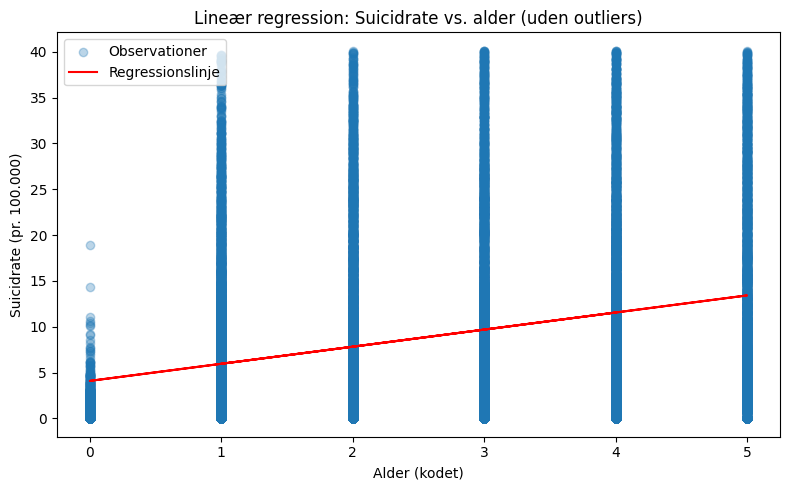

In [6]:
# Model 1: Vi bruger kun 'age_encoded' som forklarende/uafhængig variabel
X = df_no_outliers[['age_encoded']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel til at finde sammenhængen mellem alder og suicidrate
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE (mål for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi visualiserer datapunkterne og regressionslinjen for at se sammenhængen mellem alder og suicidrate
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Observationer")
plt.plot(X, y_pred, color="red", label="Regressionslinje")
plt.xlabel("Alder (kodet)")
plt.ylabel("Suicidrate (pr. 100.000)")
plt.title("Lineær regression: Suicidrate vs. alder (uden outliers)")
plt.legend()
plt.tight_layout()
plt.show()




### Model 1 – Lineær regression: Suicidrate vs. Alder

I denne første model undersøgte vi, hvordan **alderen alene påvirker selvmordsraten**, målt som `suicides/100k pop`. Vi brugte den numeriske variabel `age_encoded`, hvor hver værdi svarer til en bestemt aldersgruppe – fx `0 = 5-14 år`, `1 = 15-24 år` osv.

#### Resultater:

- **Forklaringsgrad (R²)**: ca. **0.108**  
  Alder alene forklarer ca. **10.8%** af variationen i selvmordsraten. Det viser en svag, men tydelig sammenhæng.

- **Koefficient**: **1.87**  
  For hver gang vi går op til en ældre aldersgruppe, stiger den forventede selvmordsrate med ca. **1.87 personer pr. 100.000 indbyggere**.

- **Intercept (for yngste gruppe)**: **4.09**  
  Det er den forventede suicidrate i aldersgruppen **5-14 år**, som har meget lave tal og derfor ikke bør bruges som sammenligningsgrundlag.

#### Et mere retvisende eksempel:
Vi sammenligner i stedet **25-34 år** (`age_encoded = 2`) med **75+ år** (`age_encoded = 5`):

- Forventet rate for 25-34 år:  
  `4.09 + (2 × 1.87) ≈ 7.83`

- Forventet rate for 75+ år:  
  `4.09 + (5 × 1.87) ≈ 13.44`

#### Hvor stor en forskel giver det i procent?
Forskellen på **5.61** svarer til en stigning på:  
**((13.44 - 7.83) × 100 / 7.83) ≈ 71,6%**  

Det svarer altså til en **stigning på over 71,6%** mellem disse aldersgrupper.


#### Konklusion:

- Der er altså en **markant højere selvmordsrate i ældre aldersgrupper** sammenlignet med yngre.
- Denne sammenhæng stemmer godt overens med det, vi tidligere observerede i vores visualiseringer.
- Alder er altså en forklarende faktor, men **kan ikke alene forklare hele variationen** i selvmordsraten.
- Derfor går vi nu videre og bygger en model med **køn** som uafhængig variabel for at se sammenhængen der.






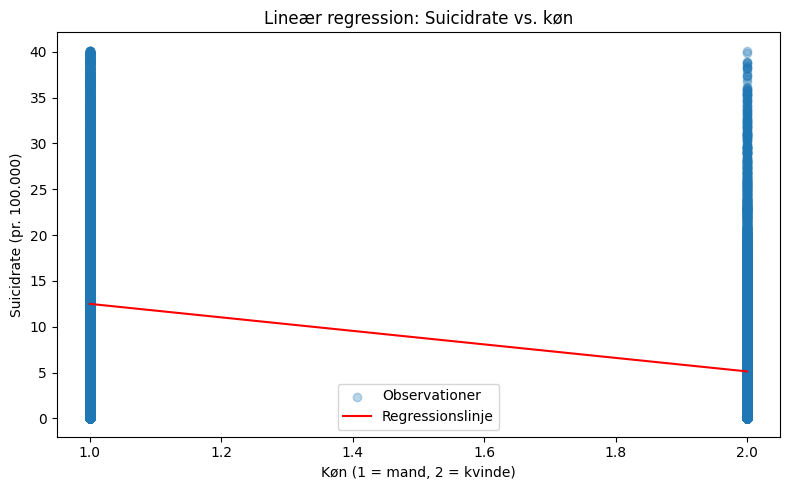

In [7]:
# Model 2: Vi bruger kun køn (sex_numeric) som forklarende/uafhængig variabel
X = df_no_outliers[['sex_numeric']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel
model2 = LinearRegression()
model2.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE (mål for modellens forklaringsevne og gennemsnitlig fejl)
y_pred2 = model2.predict(X)
r2_2 = r2_score(y, y_pred2)
mse_2 = mean_squared_error(y, y_pred2)

# Vi visualiserer datapunkterne og regressionslinjen for at se sammenhængen mellem køn og suicidrate
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Observationer")
plt.plot(X, y_pred2, color="red", label="Regressionslinje")
plt.xlabel("Køn (1 = mand, 2 = kvinde)")
plt.ylabel("Suicidrate (pr. 100.000)")
plt.title("Lineær regression: Suicidrate vs. køn")
plt.legend()
plt.tight_layout()
plt.show()



### Model 2 – Lineær regression: Suicidrate vs. Køn

I denne anden model undersøgte vi, hvordan **køn alene påvirker selvmordsraten**, målt som `suicides/100k pop`. Vi anvendte variablen `sex_numeric`, hvor:
- `1` = mand  
- `2` = kvinde

#### Resultater:

- **Forklaringsgrad (R²)**: ca. **0.152**  
  Køn alene forklarer ca. **15.2%** af variationen i selvmordsraten.

- **Koefficient**: **-4.22**  
  Når vi går fra mænd til kvinder, falder den forventede selvmordsrate med **4.22 personer pr. 100.000 indbyggere** – dvs. kvinder har i gennemsnit lavere rate.

- **Intercept (for mænd)**: ca. **12.3**  
  Det er den forventede suicidrate for mænd.

- **Forventet rate for kvinder**:  
  `12.3 - 4.22 = ca. 8.1 pr. 100.000`

#### Hvor stor en forskel giver det i procent?
Forskellen på **4.22** svarer til et fald på:  
**(4.22 × 100 / 12.3) ≈ 34%**

#### Konklusion:
- Mænd har altså en **markant højere selvmordsrate** end kvinder – omkring **34% højere** ifølge denne model.
- Forskellen stemmer overens med vores tidligere observationer og visualiseringer.
- Køn viser sig at være en relevant forklarende faktor, men **kan ikke alene forklare hele variationen** i selvmordsraten.
- Derfor går vi nu videre og bygger en model med **både alder og køn** som uafhængige variabler for at opnå en stærkere forklaringskraft.





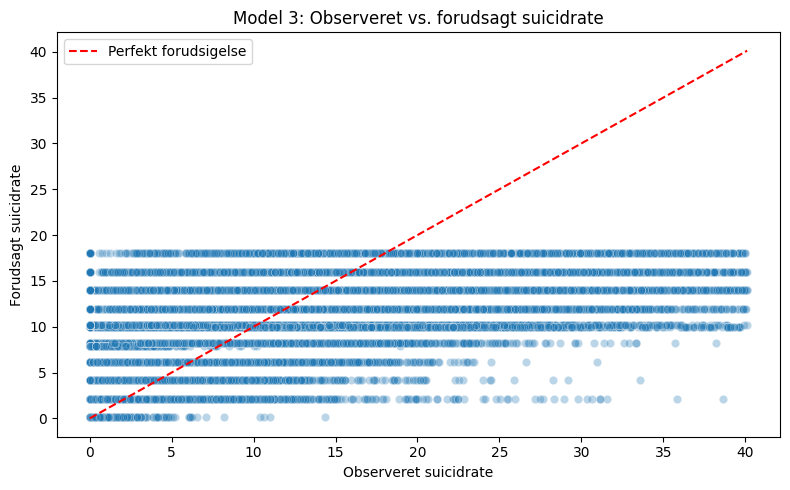

In [8]:
# Model 3: Vi inkluderer både alder og køn som uafhængige variable i modellen
X = df_no_outliers[['age_encoded', 'sex_numeric']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE (mål for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi udtrækker modellens koefficienter (effekten af hver variabel) og intercept (forventet værdi når alle variable er 0)
coef_age, coef_sex = model.coef_
intercept = model.intercept_

# Vi visualiserer forholdet mellem de observerede og forudsagte værdier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfekt forudsigelse")
plt.xlabel("Observeret suicidrate")
plt.ylabel("Forudsagt suicidrate")
plt.title("Model 3: Observeret vs. forudsagt suicidrate")
plt.legend()
plt.tight_layout()
plt.show()




### Model 3 – Lineær regression: Suicidrate vs. Alder og Køn

I denne tredje model undersøgte vi, hvordan **både alder og køn tilsammen påvirker selvmordsraten**, målt som `suicides/100k pop`. Vi anvendte de to numeriske variabler:

- `age_encoded` (0 = 5-14 år, 1 = 15-24 år osv.)  
- `sex_numeric` (1 = mand, 2 = kvinde)

#### Resultater:

- **Forklaringsgrad (R²)**: ca. **0.272**  
  Kombinationen af alder og køn forklarer nu **27.2%** af variationen i selvmordsraten – en væsentlig forbedring i forhold til modellerne med kun én variabel.

- **Koefficient for alder (`age_encoded`)**: **2.02**  
  For hver ældre aldersgruppe stiger den forventede selvmordsrate med ca. **2.02 personer pr. 100.000 indbyggere**.

- **Koefficient for køn (`sex_numeric`)**: **-7.83**  
  Når vi går fra mand til kvinde, falder den forventede selvmordsrate med **7.83 personer pr. 100.000** – altså kvinder har lavere rate end mænd, uanset alder.

- **Intercept (mand, yngste gruppe)**: **15.75**  
  Det er den forventede selvmordsrate for en mand i den yngste aldersgruppe (5-14 år).

#### Eksempel – sammenligning af grupper:

- **Mand, 75+ år**:  
  `15.75 + (5 × 2.02) + (1 × -7.83) = ca. 17.97`

- **Kvinde, 75+ år**:  
  `15.75 + (5 × 2.02) + (2 × -7.83) = ca. 10.14`

> Det viser, at **både alder og køn har stor betydning**, og deres kombination giver en bedre forklaring på selvmordsraten end modellerne hver for sig.

#### Konklusion:

- Både **alder og køn** har markant effekt på selvmordsraten – ældre personer og mænd har generelt højere rater.
- Denne model bekræfter og **styrker** det, vi allerede havde set i de tidligere modeller og visualiseringer.
- Med en forklaringsgrad på over 27% er denne model betydeligt stærkere end de tidligere og giver os **et bedre statistisk grundlag for forståelsen** af, hvem der er mest udsatte.
- Vi går nu videre og undersøger, om økonomiske forhold (BNP pr. indbygger) har en yderligere forklarende værdi.


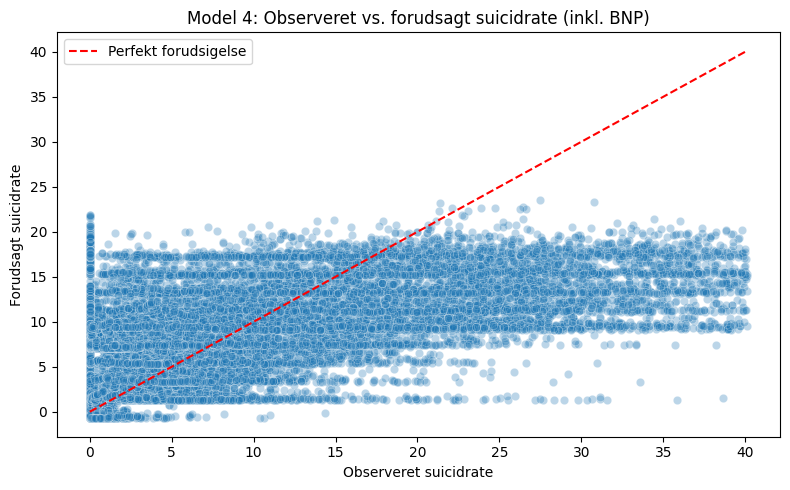

In [9]:
# Model 4: Vi inkluderer alder, køn og BNP pr. indbygger som uafhængige variable
X = df_no_outliers[['age_encoded', 'sex_numeric', 'gdp_per_capita ($)']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE (mål for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi udtrækker koefficienterne (effekten af hver variabel) og intercept (forventet værdi når alle variable er 0)
coef_age, coef_sex, coef_gdp = model.coef_
intercept = model.intercept_

# Vi visualiserer forholdet mellem de observerede og forudsagte værdier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfekt forudsigelse")
plt.xlabel("Observeret suicidrate")
plt.ylabel("Forudsagt suicidrate")
plt.title("Model 4: Observeret vs. forudsagt suicidrate (inkl. BNP)")
plt.legend()
plt.tight_layout()
plt.show()



### Model 4 – Lineær regression: Suicidrate vs. Alder, Køn og BNP

I denne fjerde model undersøgte vi, hvordan **alder**, **køn** og **BNP pr. indbygger** samlet set påvirker selvmordsraten, målt som `suicides/100k pop`.

#### Resultater:

- **Forklaringsgrad (R²)**: ca. **0.282**  
  Modellen forklarer nu ca. **28.2% af variationen** i selvmordsraten – den højeste forklaringsgrad blandt vores modeller.

- **Koefficienter**:
  - **Alder (`age_encoded`)**: ca. **1.82**  
    Hver gang vi går op i aldersgruppe, stiger den forventede selvmordsrate med ca. **1.82 personer pr. 100.000 indbyggere**.
  - **Køn (`sex_numeric`)**: ca. **-4.19**  
    Når vi går fra mænd (1) til kvinder (2), falder den forventede selvmordsrate med ca. **4.19**.
  - **BNP pr. indbygger (`gdp_per_capita ($)`)**: ca. **0.00003**  
    Meget lille effekt – det svarer til en stigning på **0.03** i selvmordsrate pr. **1.000 USD** stigning i BNP.

- **Intercept**: ca. **4.11**  
  Det forventede antal selvmord pr. 100.000 for en ung mand med lavt BNP.

#### Fortolkning:

- **Alder og køn er stadig de stærkeste faktorer** og bekræfter vores tidligere analyser.
- **BNP har en meget lille effekt**, hvilket stemmer overens med vores korrelationsmatrix – økonomiske faktorer alene har lav forklaringskraft i dette datasæt.
- Den samlede forklaringsgrad er stadig moderat (**28.2%**), hvilket tyder på, at **andre faktorer** (som psykisk helbred, kultur eller sociale forhold) spiller en stor rolle.

---

### Konklusion:

- Ved at kombinere alder, køn og BNP har vi opnået den **bedste forklaringskraft hidtil**, men modellen **forklarer stadig kun knap en tredjedel** af variationen i selvmordsraten.
- **Alder og køn** er de mest betydningsfulde faktorer i modellen, mens **BNP har meget begrænset effekt**.
- Modellen **kan bruges til at forstå overordnede mønstre**, f.eks. at ældre mænd har højere suicidrater, men den er **ikke præcis nok til at forudsige selvmordsrate på individniveau**.
- For bedre forudsigelsesevne ville det være nødvendigt at inkludere flere relevante faktorer såsom:
  - Psykisk helbred
  - Sociale relationer
  - Livsomstændigheder
  - Adgang til hjælp og støtte

Modellen giver altså **indsigt i tendenser**, men **bør ikke bruges som beslutningsgrundlag uden yderligere data**.



---

### Næste skridt – Machine Learning – Sprint 3

Efter vores fjerde model kan vi konkludere, at selv en lineær regression med **flere uafhængige variabler** kun forklarer en begrænset del af variationen i selvmordsraten. Det tyder på, at der sandsynligvis findes **mere komplekse og ikke-lineære sammenhænge**, som de simple modeller ikke fanger.

Derfor fortsætter vi nu med at bruge **machine learning-metoder**, hvor målet er at:

- Finde **ikke-lineære mønstre og interaktioner** mellem variabler  
- Forbedre modellens **præcision og forklaringskraft**  
- Undersøge, om mere avancerede modeller kan **give bedre forudsigelser** af selvmordsrater

Vi har valgt at arbejde videre med modeller, vi kender fra undervisningen, og som samtidig er velegnede til regression:

- **Decision Tree Regressor**  
- **Random Forest Regressor**  
- **K-Nearest Neighbors Regressor (KNN)**

Decision Tree er en enkel og visuel model, som gør det nemt at følge, hvordan beslutninger træffes på baggrund af data. Random Forest bygger videre på dette ved at kombinere mange træer for at opnå mere stabile og præcise resultater. KNN er en anden simpel metode, hvor forudsigelsen baseres på gennemsnittet af de nærmeste naboer. Den kan være relevant at tage med for at sammenligne forskellige tilgange.

Målet er ikke nødvendigvis at bygge en perfekt forudsigelsesmodel, men at **opnå ny indsigt** og vurdere, om machine learning kan bidrage med mere forklaring end de modeller, vi hidtil har arbejdet med.

---

